<a href="https://colab.research.google.com/github/TheAlchemist010/DeepLearning-Notebooks/blob/main/FIT3181/A1_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:#0b486b">  FIT3181: Deep Learning (2024)</span>
***
*CE/Lecturer (Clayton):*  **Dr Trung Le** | trunglm@monash.edu <br/>
*Lecturer (Clayton):* **Prof Dinh Phung** | dinh.phung@monash.edu <br/>
*Lecturer (Malaysia):*  **Dr Arghya Pal** | arghya.pal@monash.edu <br/>
*Lecturer (Malaysia):*  **Dr Lim Chern Hong** | lim.chernhong@monash.edu <br/>  <br/>
*Head Tutor 3181:*  **Miss Vy Vo** |  \[v.vo@monash.edu \] <br/>
*Head Tutor 5215:*  **Dr Van Nguyen** |  \[van.nguyen1@monash.edu \]

<br/> <br/>
Faculty of Information Technology, Monash University, Australia
***

# <span style="color:#0b486b">  Student Information</span>
***
Surname: **Gallagher**  <br/>
Firstname: **Daniel**    <br/>
Student ID: **33094969**    <br/>
Email: **dgal0013@student.monash.edu**    <br/>
Your tutorial time: **Monday 4-6PM**    <br/>
***

# <span style="color:#0b486b">Deep Neural Networks</span>
### Due: <span style="color:red">11:55pm Sunday, 8 September 2024</span>  (Sunday)

#### <span style="color:red">Important note:</span> This is an **individual** assignment. It contributes **25%** to your final mark. Read the assignment instructions carefully.

## <span style="color:#0b486b">Part 2: Deep Neural Networks (DNN) </span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 25 points]<span></div>

The second part of this assignment is to demonstrate your basis knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the tutorials covered from weeks 1 to 2**. Going through these materials before attempting this assignment is highly recommended.

In the second part of this assignment, you are going to work with the FashionMNIST dataset for image recognition task. It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem is significantly more challenging than MNIST.

In [2]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

torch.manual_seed(1234)

**Load the Fashion MNIST using `torchvision`**

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset_orgin = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

print(train_dataset_orgin.data.shape, train_dataset_orgin.targets.shape)
print(test_dataset.data.shape, test_dataset.targets.shape)

train_dataset_orgin.data = train_dataset_orgin.data.view(-1, 28*28)
test_dataset.data = test_dataset.data.view(-1, 28*28)

print(train_dataset_orgin.data.shape, train_dataset_orgin.targets.shape)
print(test_dataset.data.shape, test_dataset.targets.shape)

N = len(train_dataset_orgin)
print(f"Number of training samples: {N}")
N_train = int(0.9*N)
N_val = N - N_train
print(f"Number of training samples: {N_train}")
print(f"Number of validation samples: {N_val}")

train_dataset, val_dataset = torch.utils.data.random_split(train_dataset_orgin, [N_train, N_val])


train_loader = DataLoader(dataset=train_dataset_orgin, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

100%|██████████| 26421880/26421880 [00:11<00:00, 2393583.26it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 215043.38it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:06<00:00, 639174.82it/s] 


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5562152.75it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

torch.Size([60000, 28, 28]) torch.Size([60000])
torch.Size([10000, 28, 28]) torch.Size([10000])
torch.Size([60000, 784]) torch.Size([60000])
torch.Size([10000, 784]) torch.Size([10000])
Number of training samples: 60000
Number of training samples: 54000
Number of validation samples: 6000


####  <span style="color:red">**Question 2.1:**</span> Write the code to visualize a mini-batch in `train_loader` including its images and labels.

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

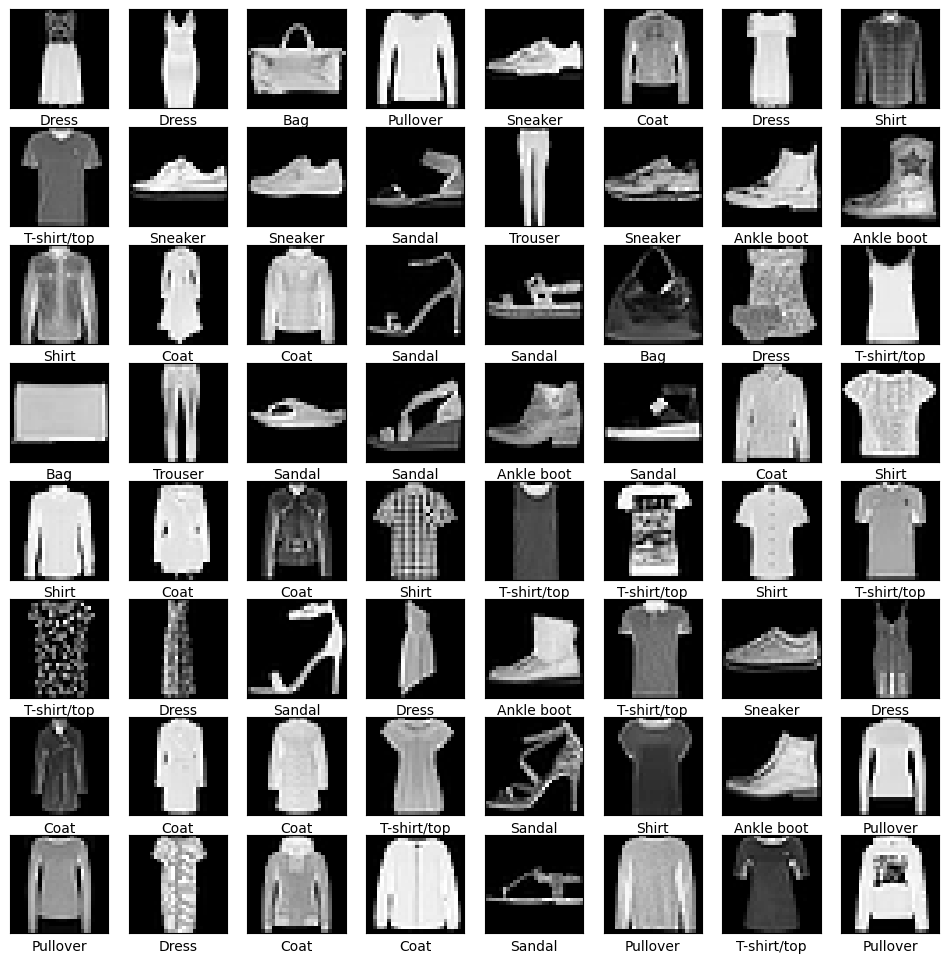

In [4]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def imshow(img):
    img = img / 2 + 0.5
    img = img.squeeze()
    plt.imshow(img, cmap='gray')

def visualize_data(images, categories, images_per_row = 8):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    n_images = len(images)
    n_rows = math.ceil(float(n_images)/images_per_row)
    fig = plt.figure(figsize=(1.5*images_per_row, 1.5*n_rows))
    fig.patch.set_facecolor('white')
    for i in range(n_images):
        plt.subplot(n_rows, images_per_row, i+1)
        plt.xticks([])
        plt.yticks([])
        imshow(images[i])
        class_index = categories[i]
        plt.xlabel(class_names[class_index])
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.view(-1, 1, 28, 28)
images = images.numpy()
visualize_data(images, labels)

####<span style="color:red">**Question 2.2:**</span> Write the code for the feed-forward neural net using PyTorch

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We now develop a feed-forward neural network with the architecture $784 \rightarrow 40(ReLU) \rightarrow 30(ReLU) \rightarrow 10(softmax)$. You can choose your own way to implement your network and an optimizer of interest. You should train model in $50$ epochs and evaluate the trained model on the test set.

In [7]:
def create_model():
  model = torch.nn.Sequential(
      torch.nn.Linear(784, 40),
      torch.nn.ReLU(),
      torch.nn.Linear(40, 30),
      torch.nn.ReLU(),
      torch.nn.Linear(30, 10),
  )
  return model

def compute_acc(model, loader):
  # Change the model to the evaluation mode (important for the model with batch-norm and drop-out layers)
  model.eval()
  # In test phase, we don't need to compute gradients (for memory efficiency)
  with torch.no_grad():
    corrects = 0
    totals =0
    for (batchX, batchY) in loader:
      batchX, batchY = batchX.to(device), batchY.to(device)
      batchX = batchX.view(batchX.size(0), -1)
      outputs = model(batchX.type(torch.float32)) #feed batch to the model
      totals += batchY.size(0) #accumulate totals with the current batch size
      predicted = torch.argmax(outputs.data, 1) #get the predicted class
      corrects += (predicted == batchY.type(torch.long)).sum().item() #accumulate correct predictions
  acc = float(corrects)/totals #compute the accuracy
  return acc

def compute_loss(model, loss_fn, loader):
  loss = 0
  for (batchX, batchY) in loader:
    batchX, batchY = batchX.to(device), batchY.to(device)
    batchX = batchX.view(batchX.size(0), -1)
    loss += loss_fn(model(batchX.type(torch.float32)), batchY.type(torch.long))
  return float(loss)/len(loader)


def fit(model= None, train_loader = None, valid_loader= None, optimizer = torch.optim.Adam,
        learning_rate=0.001, num_epochs = 50, verbose = True, seed= 1234, loss_fn = torch.nn.CrossEntropyLoss()):
  torch.manual_seed(seed) #set the random seed for Torch
  optim = optimizer(model.parameters(), lr = learning_rate) #declare optimizer
  history = dict() #initialize the history for keep tracking of training information
  history['val_loss'] = list()
  history['val_acc'] = list()
  history['train_loss'] = list()
  history['train_acc'] = list()
  for epoch in range(num_epochs):
      model.train() #set the model in training mode
      for i, (X, y) in enumerate(train_loader):
          X, y = X.to(device), y.to(device)
          # Flatten the input data
          X = X.view(X.size(0), -1) # Reshape to (batch_size, 784)
          # Forward pass
          outputs = model(X.type(torch.float32))
          loss = loss_fn(outputs, y.type(torch.long))
          # Backward and optimize
          optim.zero_grad()
          loss.backward()
          optim.step()
      #losses and accuracies for epoch
      val_loss = compute_loss(model, loss_fn, valid_loader)
      val_acc = compute_acc(model, valid_loader)
      train_loss = compute_loss(model, loss_fn, train_loader)
      train_acc = compute_acc(model, train_loader)
      history['val_loss'].append(val_loss)
      history['val_acc'].append(val_acc)
      history['train_loss'].append(train_loss)
      history['train_acc'].append(train_acc)
      if not verbose: #verbose = True means we do not show the training information during training
        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"train loss= {train_loss:.4f} - train acc= {train_acc*100:.2f}% - valid loss= {val_loss:.4f} - valid acc= {val_acc*100:.4f}%")
  return history

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
nn = create_model().to(device)
history = fit(nn, train_loader = train_loader, valid_loader= test_loader,
        optimizer = torch.optim.Adam, learning_rate = 0.005, num_epochs = 10, verbose= False, loss_fn = torch.nn.CrossEntropyLoss())

Epoch 1/10
train loss= 0.4459 - train acc= 83.89% - valid loss= 0.4902 - valid acc= 82.4600%
Epoch 2/10
train loss= 0.3580 - train acc= 86.75% - valid loss= 0.4086 - valid acc= 85.4400%
Epoch 3/10
train loss= 0.3466 - train acc= 87.40% - valid loss= 0.4039 - valid acc= 85.6400%
Epoch 4/10
train loss= 0.3667 - train acc= 86.43% - valid loss= 0.4332 - valid acc= 84.5700%
Epoch 5/10
train loss= 0.3465 - train acc= 87.02% - valid loss= 0.4210 - valid acc= 84.6500%
Epoch 6/10
train loss= 0.3334 - train acc= 88.00% - valid loss= 0.4284 - valid acc= 85.8000%
Epoch 7/10
train loss= 0.3221 - train acc= 87.85% - valid loss= 0.4170 - valid acc= 85.4400%
Epoch 8/10
train loss= 0.3076 - train acc= 88.74% - valid loss= 0.3932 - valid acc= 86.1000%
Epoch 9/10
train loss= 0.3031 - train acc= 88.67% - valid loss= 0.4075 - valid acc= 85.7900%
Epoch 10/10
train loss= 0.2952 - train acc= 89.00% - valid loss= 0.3828 - valid acc= 86.6800%


####  <span style="color:red">**Question 2.3:**</span> Tuning hyper-parameters with grid search
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>


Assume that you need to tune the number of neurons on the first and second hidden layers $n_1 \in \{20, 40\}$, $n_2 \in \{20, 40\}$  and the used activation function  $act \in \{sigmoid, tanh, relu\}$. The network has the architecture pattern $784 \rightarrow n_1 (act) \rightarrow n_2(act) \rightarrow 10(softmax)$ where $n_1, n_2$, and $act$ are in their grides. Write the code to tune the hyper-parameters $n_1, n_2$, and $act$. Note that you can freely choose the optimizer and learning rate of interest for this task.

In [9]:
def create_model_params(n1, n2, act):
  model = torch.nn.Sequential(
      torch.nn.Linear(784, n1),
      act,
      torch.nn.Linear(n1, n2),
      act,
      torch.nn.Linear(n2, 10),
  )
  return model

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

params = [ [20,40], [20,40], [torch.nn.Sigmoid(), torch.nn.Tanh(), torch.nn.ReLU()]]

best_acc = 0
for n1 in params[0]:
  for n2 in params[1]:
    for act in params[2]:
      print(f"n1={n1}, n2={n2}, act={act}")
      nn = create_model_params(n1, n2, act).to(device)
      history = fit(nn, train_loader = train_loader, valid_loader= test_loader,
        optimizer = torch.optim.Adam, learning_rate = 0.005, num_epochs =10, verbose= True, loss_fn = torch.nn.CrossEntropyLoss())
      val_acc = history['val_acc'][-1]
      if val_acc > best_acc:
        best_acc = val_acc
        best_params = [n1, n2, act]
        best_model = nn


print(f"The best valid accuracy is {best_acc*100:.2f}% with {best_params}")

n1=20, n2=20, act=Sigmoid()
n1=20, n2=20, act=Tanh()
n1=20, n2=20, act=ReLU()
n1=20, n2=40, act=Sigmoid()
n1=20, n2=40, act=Tanh()
n1=20, n2=40, act=ReLU()
n1=40, n2=20, act=Sigmoid()
n1=40, n2=20, act=Tanh()
n1=40, n2=20, act=ReLU()
n1=40, n2=40, act=Sigmoid()
n1=40, n2=40, act=Tanh()
n1=40, n2=40, act=ReLU()
The best valid accuracy is 86.23% with [40, 20, ReLU()]


####  <span style="color:red">**Question 2.4:**</span> Implement the loss with the form: $loss(p,y)=CE(1_{y},p)+\lambda H(p)$ where $H(p)=-\sum_{i=1}^{M}p_{i}\log p_{i}$ is the entropy of $p$, $p$ is the prediction probabilities of a data point $x$ with the ground-truth label $y$, $1_y$ is an one-hot label, and $\lambda >0$ is a trade-off parameter. Set $\lambda = 0.1$ to train a model.

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>


In [26]:
class CustomLoss(torch.nn.Module):
    def __init__(self, l):
      super().__init__()
      self.l = l

    def forward(self, predictions, targets):
        # Ensure targets are one-hot encoded
        targets_one_hot = torch.zeros_like(predictions)
        targets_one_hot.scatter_(1, targets.unsqueeze(1), 1)

        # Compute softmax and log probabilities
        softmax_probs = torch.softmax(predictions, dim=1)
        log_probs = torch.log(softmax_probs + 1e-12)
        ce_loss = torch.mean(torch.sum(-targets_one_hot * log_probs, dim=1))

        H = -torch.mean(torch.sum(softmax_probs * log_probs, dim=1))

        return ce_loss + (self.l * H)

nn = create_model().to(device)
history = fit(nn, train_loader = train_loader, valid_loader= test_loader,
        optimizer = torch.optim.Adam, learning_rate = 0.005, num_epochs =10, verbose= False, loss_fn = CustomLoss(l=0.1))

print(history)

Epoch 1/10
train loss= 0.5004 - train acc= 83.45% - valid loss= 0.5487 - valid acc= 82.0100%
Epoch 2/10
train loss= 0.4127 - train acc= 86.17% - valid loss= 0.4763 - valid acc= 84.5400%
Epoch 3/10
train loss= 0.3801 - train acc= 87.36% - valid loss= 0.4449 - valid acc= 85.5200%
Epoch 4/10
train loss= 0.3798 - train acc= 87.31% - valid loss= 0.4521 - valid acc= 85.4000%
Epoch 5/10
train loss= 0.3529 - train acc= 88.16% - valid loss= 0.4422 - valid acc= 85.8700%
Epoch 6/10
train loss= 0.3549 - train acc= 88.38% - valid loss= 0.4615 - valid acc= 86.4400%
Epoch 7/10
train loss= 0.3530 - train acc= 88.03% - valid loss= 0.4424 - valid acc= 85.5900%
Epoch 8/10
train loss= 0.3328 - train acc= 88.65% - valid loss= 0.4388 - valid acc= 86.1200%
Epoch 9/10
train loss= 0.3364 - train acc= 88.31% - valid loss= 0.4454 - valid acc= 85.4300%
Epoch 10/10
train loss= 0.3213 - train acc= 89.21% - valid loss= 0.4297 - valid acc= 86.7000%
{'val_loss': [0.5487102031707763, 0.47632951736450196, 0.444905519485

####  <span style="color:red">**Question 2.5:**</span> Experimenting with **sharpness-aware minimization** technique
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

Sharpness-aware minimization (SAM) (i.e., [link for main paper](https://openreview.net/pdf?id=6Tm1mposlrM) from Google Deepmind) is a simple yet but efficient technique to improve the generalization ability of deep learning models on unseen data examples. In your research or your work, you might potentially use this idea. Your task is to read the paper and implement *Sharpness-aware minimization (SAM)*. Finally, you need to apply SAM to the best architecture found in **Question 2.3**.   

In [31]:
model = best_model
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
rho = 0.05

for epoch in range(10):
  for i, (X, y) in enumerate(train_loader):
    X, y = X.to(device), y.to(device)
    # Flatten the input data
    X = X.view(X.size(0), -1) # Reshape to (batch_size, 784)

    # Standard forward pass
    outputs = model(X.type(torch.float32))
    loss = loss_fn(outputs, y.type(torch.long))

    # Standard back propogation
    loss.backward()

    # Save the current gradients and params
    grads = [p.grad.clone() for p in model.parameters()]
    original_params = [p.data.clone() for p in model.parameters()]

    # Randomly perturb
    with torch.no_grad():
      for p, g in zip(model.parameters(), grads):
        if g is not None:
          p.add_(rho * g / (torch.norm(g) + 1e-12))

    # Reset Optimiser
    optimizer.zero_grad()

    # Forward pass with the perturbed params
    outputs = model(X.type(torch.float32))
    loss = loss_fn(outputs, y.type(torch.long))
    loss.backward()

    # Reset params to before perturbation
    with torch.no_grad():
      for p, g, op in zip(model.parameters(), grads, original_params):
        if g is not None:
          p.data = op

    # Optimise based on the new losses
    optimizer.step()
    optimizer.zero_grad()
  val_acc = compute_acc(model, test_loader)
  train_acc = compute_acc(model, train_loader)
  print(f"Epoch {epoch+1}/{10}")
  print(f"train acc= {train_acc*100:.2f}% valid acc= {val_acc*100:.4f}%")



Epoch 1/10
train acc= 90.01% valid acc= 87.3600%
Epoch 2/10
train acc= 90.06% valid acc= 87.5000%
Epoch 3/10
train acc= 90.18% valid acc= 87.4800%
Epoch 4/10
train acc= 90.12% valid acc= 87.3400%
Epoch 5/10
train acc= 90.16% valid acc= 87.6400%
Epoch 6/10
train acc= 90.09% valid acc= 87.5900%
Epoch 7/10
train acc= 90.20% valid acc= 87.5500%
Epoch 8/10
train acc= 90.09% valid acc= 87.3400%
Epoch 9/10
train acc= 90.26% valid acc= 87.5800%
Epoch 10/10
train acc= 90.19% valid acc= 87.4500%
